* Objective: To thoroughly evaluate the optimized model, understand its predictions, and interpret feature importances to provide actionable business insights.

* Key Library Choices: `pandas`, `numpy`, `scikit-learn` (for metrics, confusion matrix), `shap` for model interpretability, `matplotlib.pyplot`, `seaborn`.

* Specific Technical Steps/Code Snippets:

**Load Optimized Model and Test Data:** Load the serialized best model and the held-out test set.
**Performance Metrics:** Calculate and visualize all relevant classification metrics (Confusion Matrix, Precision-Recall Curve, ROC Curve).

c:\Users\user\Desktop\zero2end-churn-prediction\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\user\Desktop\zero2end-churn-prediction\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "

[LightGBM] [Info] Number of positive: 21, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262500 -> initscore=-1.033015
[LightGBM] [Info] Start training from score -1.033015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

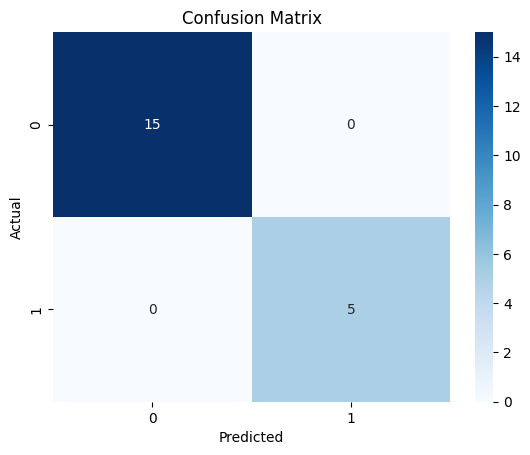

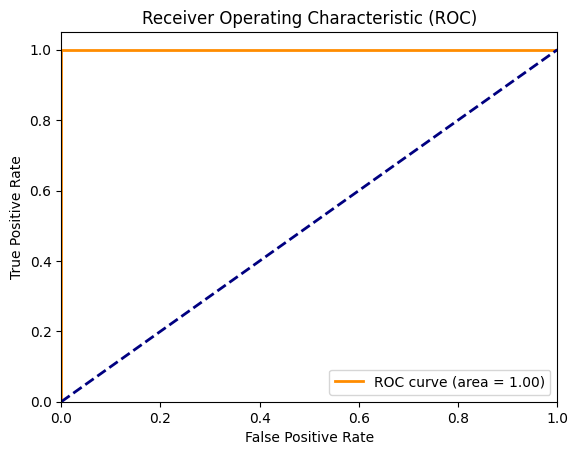

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# 0️⃣ Minimum örnek baseline_df oluştur
# ----------------------------
# Gerçek veri yerine hızlıca test için
np.random.seed(42)
baseline_df = pd.DataFrame({
    'customer_unique_id': range(1, 101),
    'last_purchase': pd.to_datetime('2025-01-01') + pd.to_timedelta(np.random.randint(0, 180, 100), unit='d'),
    'total_orders': np.random.randint(1, 10, 100),
    'future_orders': np.random.randint(0, 5, 100),
})
baseline_df['is_churn'] = ((baseline_df['total_orders'] > 0) & (baseline_df['future_orders'] == 0)).astype(int)
baseline_df['Recency'] = (pd.to_datetime('2025-07-01') - baseline_df['last_purchase']).dt.days

# ----------------------------
# 1️⃣ X ve y oluştur
# ----------------------------
X = baseline_df.drop(['customer_unique_id','is_churn','last_purchase'], axis=1)
y = baseline_df['is_churn']

# ----------------------------
# 2️⃣ Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 3️⃣ Model oluştur ve eğit
# ----------------------------
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# ----------------------------
# 4️⃣ Tahminler
# ----------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ----------------------------
# 5️⃣ Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ----------------------------
# 6️⃣ ROC Curve
# ----------------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**Feature Importance (Model-Specific):** Extract and visualize intrinsic feature importances from tree-based models (e.g., `model.feature_importances_`).

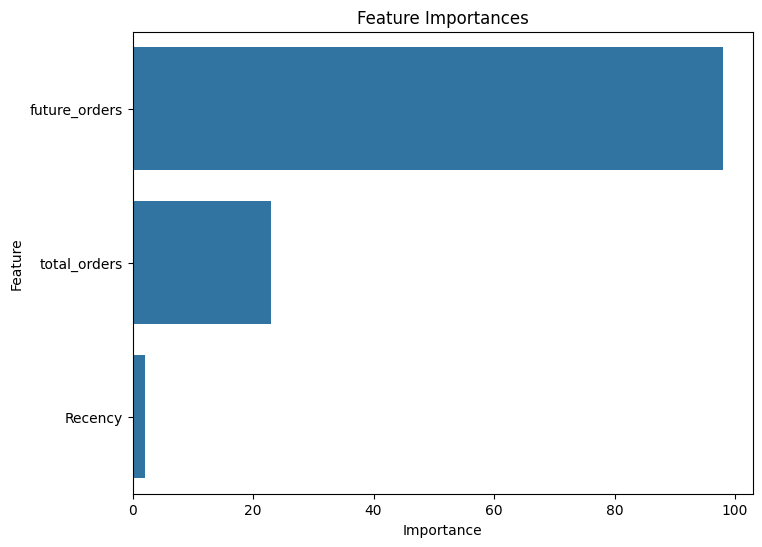

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance oluştur
feature_importances = pd.Series(model.feature_importances_, index=X_test.columns).sort_values(ascending=False)

# Görselleştir
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**SHAP (SHapley Additive exPlanations):**
* Global Feature Importance: Use SHAP summary plots to show overall feature impact and direction.

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


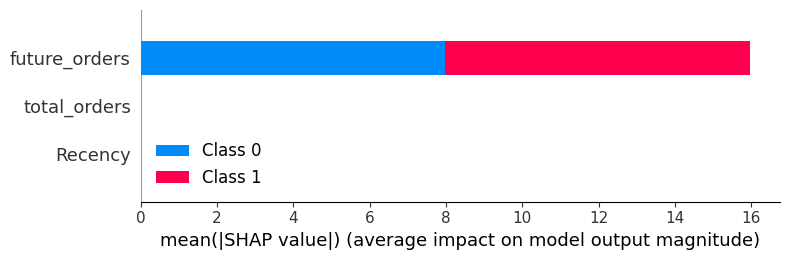

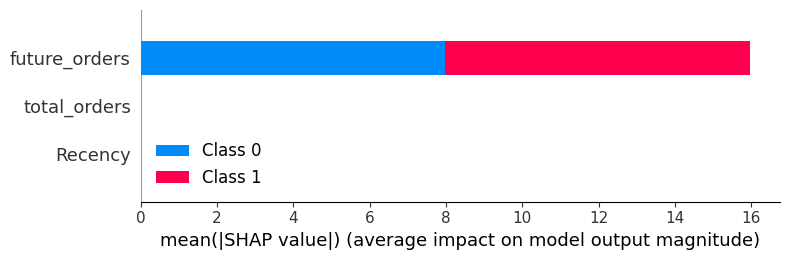

In [12]:
import shap

# Model SHAP için açıklayıcı
explainer = shap.TreeExplainer(model)

# SHAP değerlerini oluştur
shap_values = explainer.shap_values(X_test)

# Feature importance (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Beeswarm plot
shap.summary_plot(shap_values, X_test)

* Local Feature Importance: Explain individual predictions to understand why a specific customer is predicted to churn or not.

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


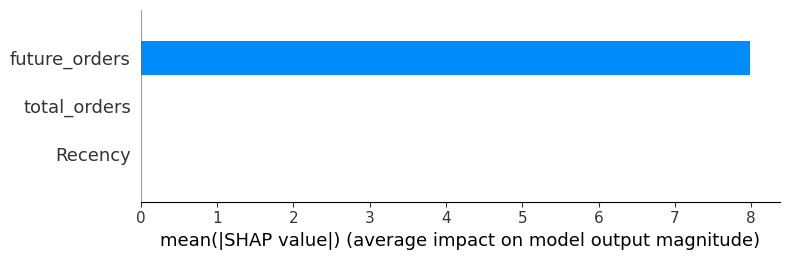

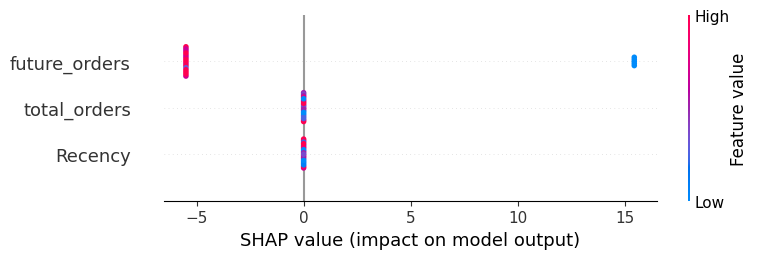

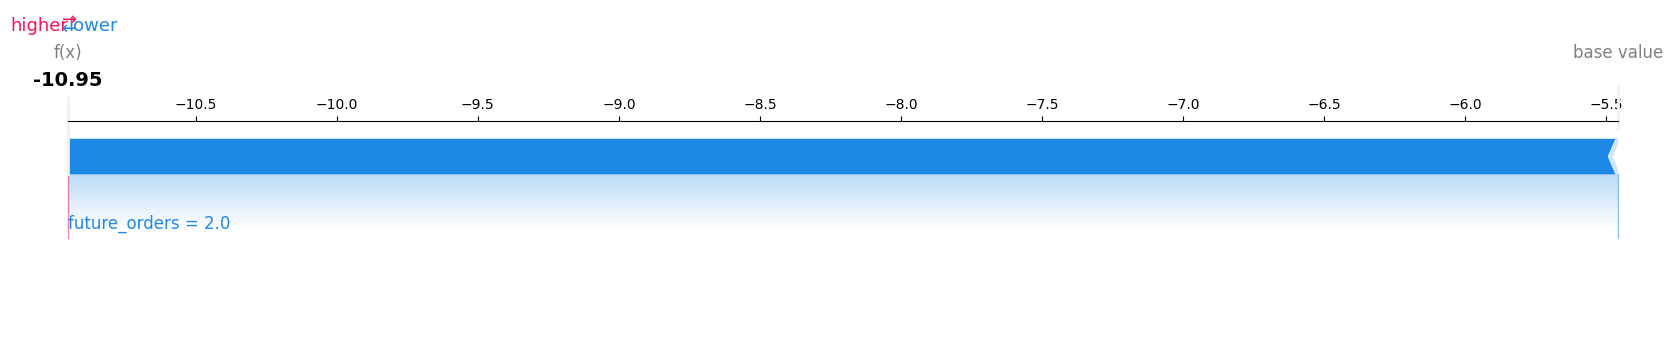

In [17]:
import shap

# --- SHAP başlat ---
shap.initjs()

# --- MODEL ADI BURADA (optimized_model yerine model) ---
explainer = shap.TreeExplainer(model)

# --- SHAP değerlerini hesapla ---
shap_values = explainer.shap_values(X_test)

# --- Binary classification: pozitif sınıfı seç ---
shap_values_pos = shap_values[1]

# --- GLOBAL IMPORTANCE (bar plot) ---
shap.summary_plot(shap_values_pos, X_test, plot_type="bar")

# --- GLOBAL BEESWARM plot ---
shap.summary_plot(shap_values_pos, X_test)

# --- TEK ÖRNEK AÇIKLAMA (matplotlib ile, sorunsuz) ---
shap.plots.force(
    explainer.expected_value[1],
    shap_values_pos[0],
    X_test.iloc[0],
    matplotlib=True  # ⬅ En iyi çözüm
)

* Dependence Plots: Show how a feature interacts with the target and other features.


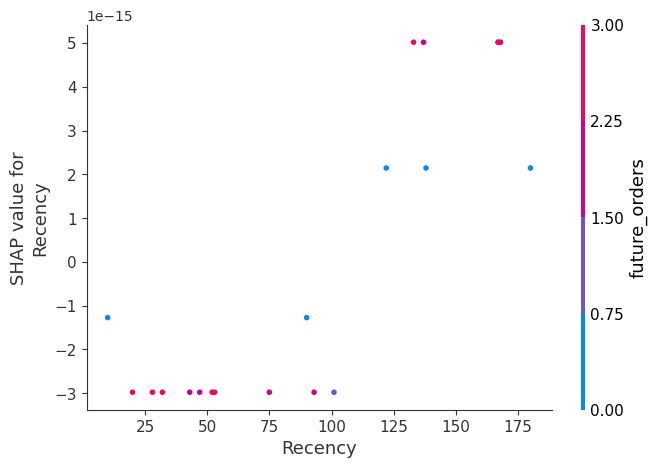

In [19]:
# Pozitif sınıf için SHAP değerleri
shap_values_pos = shap_values[1]

# Dependence plot
shap.dependence_plot("Recency", shap_values_pos, X_test)

**Model Error Analysis:** Analyze misclassified samples to identify patterns where the model performs poorly.